In [3]:
pip install nfl_data_py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 39.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 685.4/685.4 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.0 MB/s eta 0:00:00
  Created wheel for pandas: filename=pandas-1.5.3-cp312-cp312-macosx_11_0_arm64.whl size=10140885 sha256=3f7e3149a12774ca004d0b427c100b66d8708a11eb9721466d4ade9c4132e7f6
  Stored in directory: /Users/dante/Library/Caches/pip/wheels/fb/83/18/8e7307aa1185c5498c5490e4d9c8a1732d9f1056e86c3491c6
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depen

In [59]:
import pandas as pd
import nfl_data_py as nfl

# Step 1: Load and merge
stats = nfl.import_seasonal_data([*range(1999, 2024)])
players = nfl.import_players()

# Merge stats with names and birthdates
df = stats.merge(
    players[['gsis_id', 'display_name', 'birth_date']],
    left_on='player_id',
    right_on='gsis_id',
    how='left'
)

# Step 2: Filter for your superstar RBs
rbs = ["Ezekiel Elliott", "Le'Veon Bell", "Derrick Henry", "Arian Foster", "Alvin Kamara", "Marshall Faulk","Emmitt Smith", "Curtis Martin", "Barry Sanders", 
  "Walter Payton", "Frank Gore", "Adrian Peterson",
  "Steven Jackson", "LaDainian Tomlinson"]
df = df[df['display_name'].isin(rbs)]

# Step 3: Calculate age
df['birth_year'] = pd.to_datetime(df['birth_date']).dt.year
df['age'] = df['season'] - df['birth_year']

# Step 4: Add total touches, yards, TDs
df['total_touches'] = df['carries'] + df['receptions']
df['total_yards'] = df['rushing_yards'] + df['receiving_yards']
df['total_tds'] = df['rushing_tds'] + df['receiving_tds']
df['ppr_per_game'] = df['fantasy_points_ppr'] / df['games']

# Step 5: Group by player and age
summary = df.groupby(['age', 'display_name',]).agg({
    'ppr_per_game': 'mean',
    'total_touches': 'sum',
    'total_yards': 'sum',
    'total_tds': 'sum',
    'fantasy_points_ppr': 'sum',
    'games': 'sum'
}).reset_index()

# Preview the final dataset
print(summary.head(100))










    age         display_name  ppr_per_game  total_touches  total_yards   
0    21      Ezekiel Elliott     21.693333            354       1994.0  \
1    21         Le'Veon Bell     16.684615            289       1259.0   
2    21       Steven Jackson      9.228571            153        862.0   
3    22      Adrian Peterson     17.992857            257       1609.0   
4    22         Alvin Kamara     20.025000            201       1554.0   
..  ...                  ...           ...            ...          ...   
95   32        Curtis Martin     11.441667            244        853.0   
96   32         Emmitt Smith     10.478571            278       1137.0   
97   32           Frank Gore     12.087500            294       1234.0   
98   32  LaDainian Tomlinson      9.492857            117        729.0   
99   32       Marshall Faulk      7.220000            109        583.0   

    total_tds  fantasy_points_ppr  games  
0          16               325.4     15  
1           8            

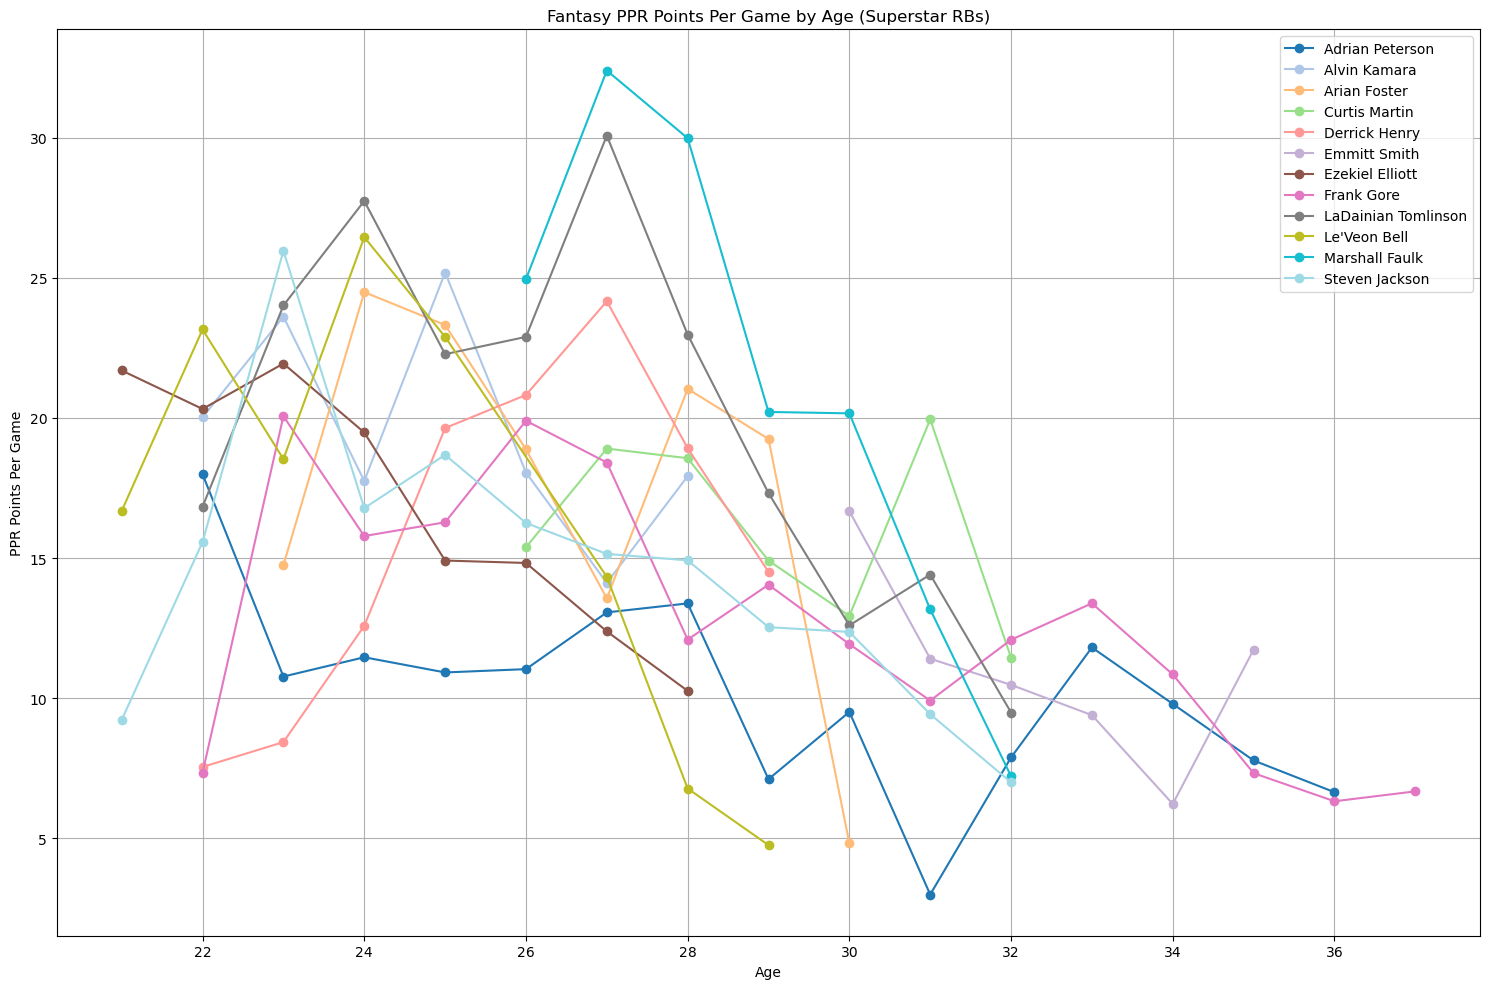

In [63]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get unique players and assign unique colors
players = summary['display_name'].unique()
colors = cm.tab20(np.linspace(0, 1, len(players)))  # tab20 supports 20 distinct colors

# Plot setup
plt.figure(figsize=(15, 10))

for i, player in enumerate(players):
    player_data = summary[summary['display_name'] == player]
    plt.plot(
        player_data['age'],
        player_data['ppr_per_game'],
        marker='o',
        label=player,
        color=colors[i]
    )

plt.title('Fantasy PPR Points Per Game by Age (Superstar RBs)')
plt.xlabel('Age')
plt.ylabel('PPR Points Per Game')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



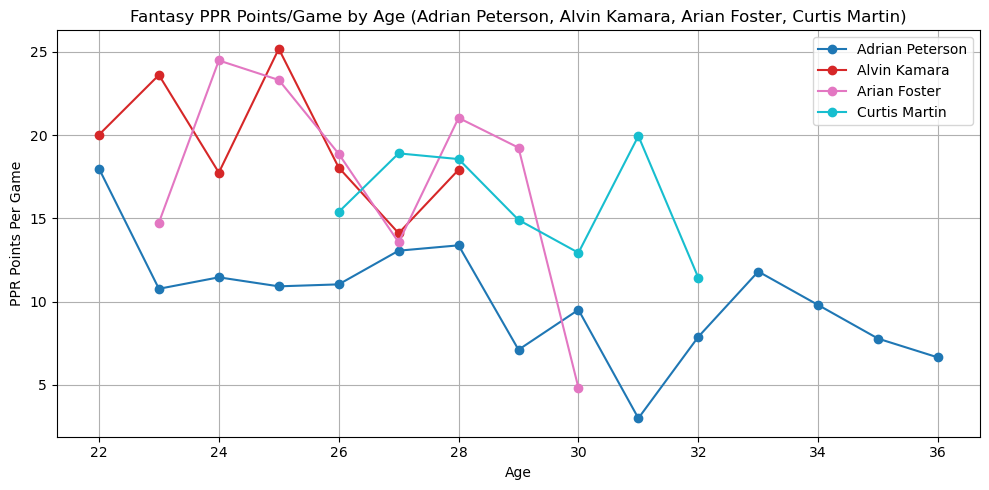

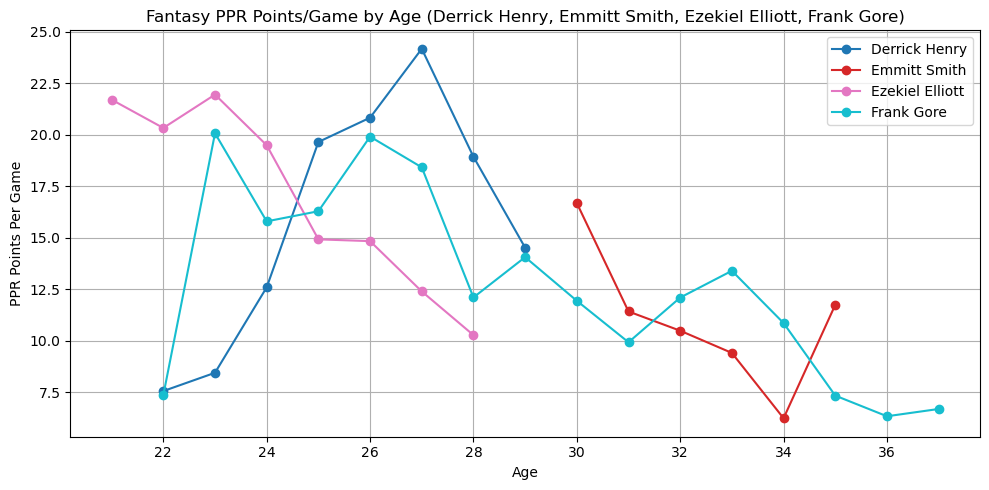

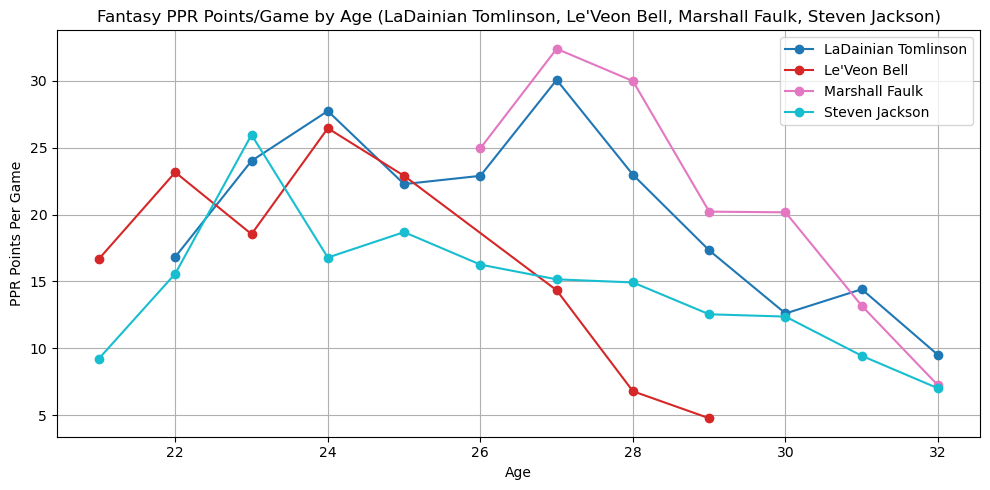

In [69]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Set group size (3 or 4)
group_size = 4

# Get all players and split into chunks
players = summary['display_name'].unique()
player_groups = [players[i:i + group_size] for i in range(0, len(players), group_size)]

# Plot each group
for group in player_groups:
    plt.figure(figsize=(10, 5))
    colors = cm.tab10(np.linspace(0, 1, len(group)))  # distinct colors

    for i, player in enumerate(group):
        player_data = summary[summary['display_name'] == player]
        plt.plot(
            player_data['age'],
            player_data['ppr_per_game'],
            marker='o',
            label=player,
            color=colors[i]
        )

    plt.title(f'Fantasy PPR Points/Game by Age ({", ".join(group)})')
    plt.xlabel('Age')
    plt.ylabel('PPR Points Per Game')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
